In [48]:
import numpy as np
import pandas as pd

In [49]:
df = pd.read_csv('winequalityN - winequalityN.csv')

In [50]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [51]:
df.sample()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3783,white,6.4,0.27,0.45,8.3,0.05,52.0,196.0,0.9955,3.18,0.48,9.5,5


In [52]:
df.shape

(6497, 13)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [54]:
import matplotlib.pyplot as plt

In [55]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [56]:
df.duplicated().sum()

1168

In [57]:
df_data = df.dropna()

In [58]:
df_data.drop_duplicates(inplace = True)

C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_12904\1763355942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.drop_duplicates(inplace = True)


In [59]:
df_data.shape

(5295, 13)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [61]:
X = df_data.drop('type', axis = 1)
y = df_data['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
# standardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
## using scaled data

knn2 = KNeighborsClassifier()
knn2.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [64]:
## using w/o scaled data
knn1 = KNeighborsClassifier()
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
## give data before scaling
import time
start = time.time()
y_pred1 = knn1.predict(X_test)
print(time.time() - start)

0.05501079559326172


In [66]:
accuracy_score(y_pred1, y_test)

0.9291784702549575

In [67]:
## give data after scaling

import time
start = time.time()
y_pred2 = knn2.predict(X_test_scaled)
print(time.time() - start)

0.12271523475646973


In [68]:
accuracy_score(y_pred2, y_test)

0.9933899905571294

In [69]:
knn3 = KNeighborsClassifier(n_neighbors = 5)
knn3.fit(X_train, y_train)
y_pred3 = knn3.predict(X_test)
accuracy_score(y_pred3, y_test)

0.9291784702549575

In [70]:
knn4 = KNeighborsClassifier(n_neighbors = 5)
knn4.fit(X_train_scaled, y_train)
y_pred4 = knn4.predict(X_test_scaled)
accuracy_score(y_pred4, y_test)

0.9933899905571294

In [71]:
# transforming using PCA into 2-D w/o  using scaling value

pca1 = PCA(n_components = 2)
X_train_pca_wo_scaling_2d = pca1.fit_transform(X_train)
X_test_pca_wo_scaling_2d = pca1.transform(X_test)

In [72]:
X_train_pca_wo_scaling_2d

array([[ 31.99822237, -20.32905818],
       [ -8.88365874,   1.91397846],
       [ 65.47627443, -22.23809225],
       ...,
       [-27.68842938,  -7.93280597],
       [-56.15308878,   6.10902977],
       [ -9.01313157,   5.08933857]])

In [73]:
X_test_pca_wo_scaling_2d

array([[ 42.696216  ,   6.91334208],
       [ -5.77878792, -23.54560608],
       [-38.09333933,  -0.2520837 ],
       ...,
       [ -8.02679231,  14.01811212],
       [-15.82316333,  -9.82781357],
       [ 67.51534657, -35.08221275]])

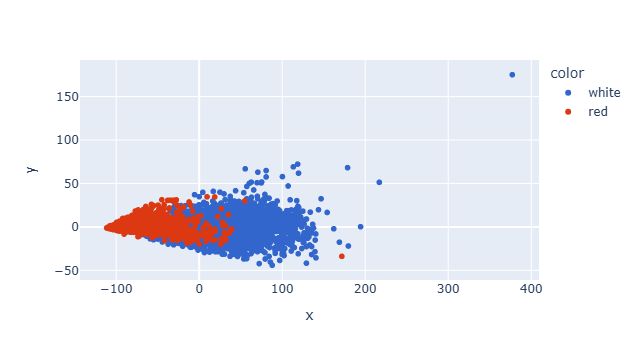

In [93]:
import plotly.express as px
y_train_pca_wo_scaling_2d = y_train.astype(str)
fig = px.scatter(x = X_train_pca_wo_scaling_2d[:, 0],
                y = X_train_pca_wo_scaling_2d[:, 1],
                color = y_train_pca_wo_scaling_2d,
                color_discrete_sequence = px.colors.qualitative.G10
                )
fig.show()

In [94]:
# transforming it in 3-D wo  scaling

pca2 = PCA(n_components = 3)
X_train_pca_wo_scaling_3d = pca2.fit_transform(X_train)
X_test_pca_wo_scaling_3d = pca2.transform(X_test)

In [95]:
X_train_pca_wo_scaling_3d

array([[ 31.99822237, -20.32905818,  -4.93848435],
       [ -8.88365874,   1.91397846,  -3.17085376],
       [ 65.47627443, -22.23809225,  -5.97979325],
       ...,
       [-27.68842938,  -7.93280597,  -2.02363747],
       [-56.15308878,   6.10902977,  -0.71670087],
       [ -9.01313157,   5.08933857,   0.56097324]])

In [96]:
X_test_pca_wo_scaling_3d

array([[ 42.696216  ,   6.91334208,  -5.10855181],
       [ -5.77878792, -23.54560608,  -3.25547915],
       [-38.09333933,  -0.2520837 ,   0.43491054],
       ...,
       [ -8.02679231,  14.01811212,  -3.35207561],
       [-15.82316333,  -9.82781357,  -2.75252849],
       [ 67.51534657, -35.08221275,  -6.43180485]])

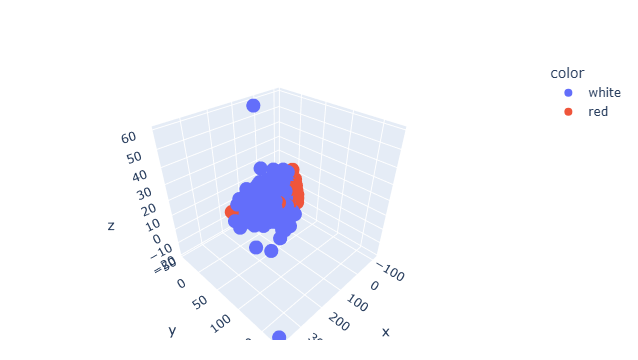

In [97]:
y_train_pca_wo_scaling_3d = y_train.astype(str)
fig = px.scatter_3d(df, x = X_train_pca_wo_scaling_3d[:, 0], y = X_train_pca_wo_scaling_3d[:, 1], z = X_train_pca_wo_scaling_3d[:, 2],
                    color = y_train_pca_wo_scaling_3d)
fig.update_layout(
    margin=dict(l = 20, r = 20, b = 20)
)
fig.show()

In [98]:
# eigen values for 2-D
pca1.explained_variance_

array([3363.83247527,  145.98922625])

In [99]:
# eigen values for 3-D
pca2.explained_variance_

array([3363.83247527,  145.98922625,   15.5781515 ])

In [100]:
# eigen vectors
pca1.components_

array([[-7.46450447e-03, -1.21013583e-03,  5.22598779e-04,
         3.85087823e-02, -1.79391848e-04,  2.33832755e-01,
         9.71470921e-01,  4.51889207e-07, -6.07417698e-04,
        -7.20210305e-04, -4.98364580e-03, -5.93582800e-04],
       [-5.10830608e-03, -8.74153667e-04, -3.69175234e-04,
         1.18631773e-02,  8.25661342e-05,  9.71994325e-01,
        -2.34447796e-01, -1.54362227e-06,  4.74472483e-04,
         3.07497614e-04,  2.95903932e-03,  9.18973649e-03]])

In [101]:
pca2.components_

array([[-7.46450447e-03, -1.21013583e-03,  5.22598779e-04,
         3.85087823e-02, -1.79391848e-04,  2.33832755e-01,
         9.71470921e-01,  4.51889207e-07, -6.07417698e-04,
        -7.20210305e-04, -4.98364580e-03, -5.93582800e-04],
       [-5.10830608e-03, -8.74153667e-04, -3.69175234e-04,
         1.18631773e-02,  8.25661342e-05,  9.71994325e-01,
        -2.34447796e-01, -1.54362227e-06,  4.74472483e-04,
         3.07497614e-04,  2.95903932e-03,  9.18973649e-03],
       [ 2.69209580e-02,  2.37754210e-03,  2.20924416e-03,
         9.96039684e-01,  2.59002668e-04, -2.00486119e-02,
        -3.48355786e-02,  4.70030504e-04, -5.80691302e-03,
        -1.67024667e-03, -7.27631870e-02, -1.49309250e-02]])

In [102]:
pca1.components_.shape

(2, 12)

In [103]:
pca2.components_.shape

(3, 12)

In [104]:
pca1.explained_variance_ratio_

array([0.95321109, 0.04136905])

In [105]:
pca2.explained_variance_ratio_

array([0.95321109, 0.04136905, 0.00441439])

In [116]:
pca3 = PCA(n_components = None)
X_train_comp_none = pca3.fit_transform(X_train)
X_test_comp_none = pca3.transform(X_test)

In [117]:
pca3.components_.shape

(12, 12)

In [118]:
pca3.explained_variance_ratio_

array([9.53211092e-01, 4.13690488e-02, 4.41438951e-03, 5.10749412e-04,
       3.42960858e-04, 1.29455715e-04, 8.95653314e-06, 5.79276482e-06,
       4.31178475e-06, 3.00047677e-06, 2.41681419e-07, 1.68869005e-10])

In [119]:
# with scaling value
pca4 = PCA(n_components = None)
X_train_comp_none = pca4.fit_transform(X_train_scaled)
X_test_comp_none = pca4.transform(X_test_scaled)

In [120]:
pca4.components_.shape

(12, 12)

In [121]:
pca4.explained_variance_ratio_

array([0.25338398, 0.22064311, 0.13758045, 0.08945723, 0.07060832,
       0.05464252, 0.0451817 , 0.04242425, 0.03938657, 0.02514279,
       0.01862054, 0.00292855])

In [122]:
np.cumsum(pca4.explained_variance_ratio_)

array([0.25338398, 0.47402709, 0.61160755, 0.70106477, 0.77167309,
       0.82631561, 0.87149731, 0.91392156, 0.95330812, 0.97845091,
       0.99707145, 1.        ])

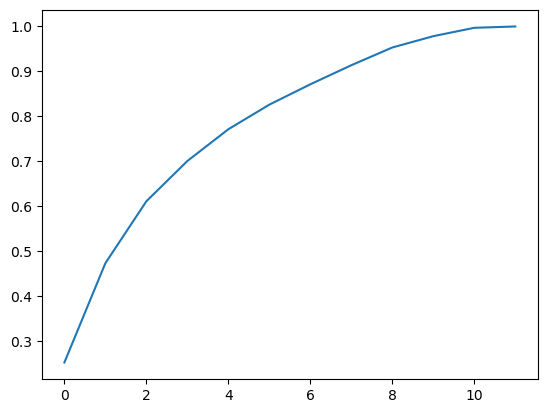

In [123]:
plt.plot(np.cumsum(pca4.explained_variance_ratio_))

In [143]:
pca5 = PCA(n_components = 5)
X_train_pca5 = pca5.fit_transform(X_train_scaled)
X_test_pca5 = pca5.transform(X_test_scaled)

knn_w_pca1 = KNeighborsClassifier(n_neighbors = 5)
knn_w_pca1.fit(X_train_pca5, y_train)
y_pred5_pca1 = knn_w_pca1.predict(X_test_pca5)
accuracy_score(y_test, y_pred5_pca)

0.9886685552407932

In [142]:
pca6 = PCA()
X_train_pca6 = pca6.fit_transform(X_train_scaled)
X_test_pca6 = pca6.transform(X_test_scaled)

knn_w_pca2 = KNeighborsClassifier(n_neighbors = 5)
knn_w_pca2.fit(X_train_pca6, y_train)
y_pred6_pca = knn_w_pca2.predict(X_test_pca6)
accuracy_score(y_test, y_pred6_pca)

0.9933899905571294

In [141]:
pca7 = PCA(n_components = 5)
X_train_pca7 = pca7.fit_transform(X_train_scaled)
X_test_pca7 = pca7.transform(X_test_scaled)

knn_w_pca3 = KNeighborsClassifier()
knn_w_pca3.fit(X_train_pca7, y_train)
y_pred7_pca = knn_w_pca.predict(X_test_pca7)
accuracy_score(y_test, y_pred7_pca)

0.9886685552407932

In [139]:
pca8 = PCA(n_components = 5)
X_train_pca8 = pca8.fit_transform(X_train_scaled)
X_test_pca8 = pca8.transform(X_test_scaled)

knn_w_pca4 = KNeighborsClassifier(n_neighbors = 5)
knn_w_pca4.fit(X_train_pca8, y_train)
y_pred8_pca = knn_w_pca.predict(X_test_pca8)
accuracy_score(y_test, y_pred8_pca)

0.9886685552407932

In [144]:
pca9 = PCA()
X_train_pca9 = pca9.fit_transform(X_train_scaled)
X_test_pca9 = pca9.transform(X_test_scaled)

knn_w_pca5 = KNeighborsClassifier()
knn_w_pca5.fit(X_train_pca9, y_train)
y_pred9_pca = knn_w_pca5.predict(X_test_pca9)
accuracy_score(y_test, y_pred9_pca)

0.9933899905571294

In [146]:
pca10 = PCA(n_components = None)
X_train_pca10 = pca10.fit_transform(X_train_scaled)
X_test_pca10 = pca10.transform(X_test_scaled)

knn_w_pca6 = KNeighborsClassifier()
knn_w_pca6.fit(X_train_pca10, y_train)
y_pred10_pca = knn_w_pca6.predict(X_test_pca10)
accuracy_score(y_test, y_pred10_pca)

0.9933899905571294

In [148]:
pca11 = PCA(n_components = None)
X_train_pca11 = pca11.fit_transform(X_train_scaled)
X_test_pca11 = pca11.transform(X_test_scaled)

knn_w_pca7 = KNeighborsClassifier(n_neighbors = 5)
knn_w_pca7.fit(X_train_pca11, y_train)
y_pred11_pca = knn_w_pca7.predict(X_test_pca11)
accuracy_score(y_test, y_pred11_pca)

0.9933899905571294